In [1]:
PROJECT_BASE = "/home/juhel-phanju/Documents/backup/MIGRATION/codes/poc/dbt/ecom/ecom/models"

In [2]:
from data_tools.libs.smart_query_generator.models.models import (
    ETLModel,
    FieldsModel,
    FilterModel,
    SelectionModel,
    SortByModel,
)
from data_tools.sql_generator import SqlGenerator

etl = ETLModel(
    name="test_etl",
    fields=[
        FieldsModel(id="order_items.price", name="price", category="measure", measure_func="count"),
    ],
    filter=FilterModel(
        selections=[SelectionModel(id="products.product_id", values=["aaa", "bbb"])],
        sort_by=[SortByModel(id="orders.order_id", direction="desc")],
    ),
)

sql_generator = SqlGenerator(project_base=PROJECT_BASE)

/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "schema" in "Source" shadows an attribute in parent "BaseResource"
  warnings.warn(


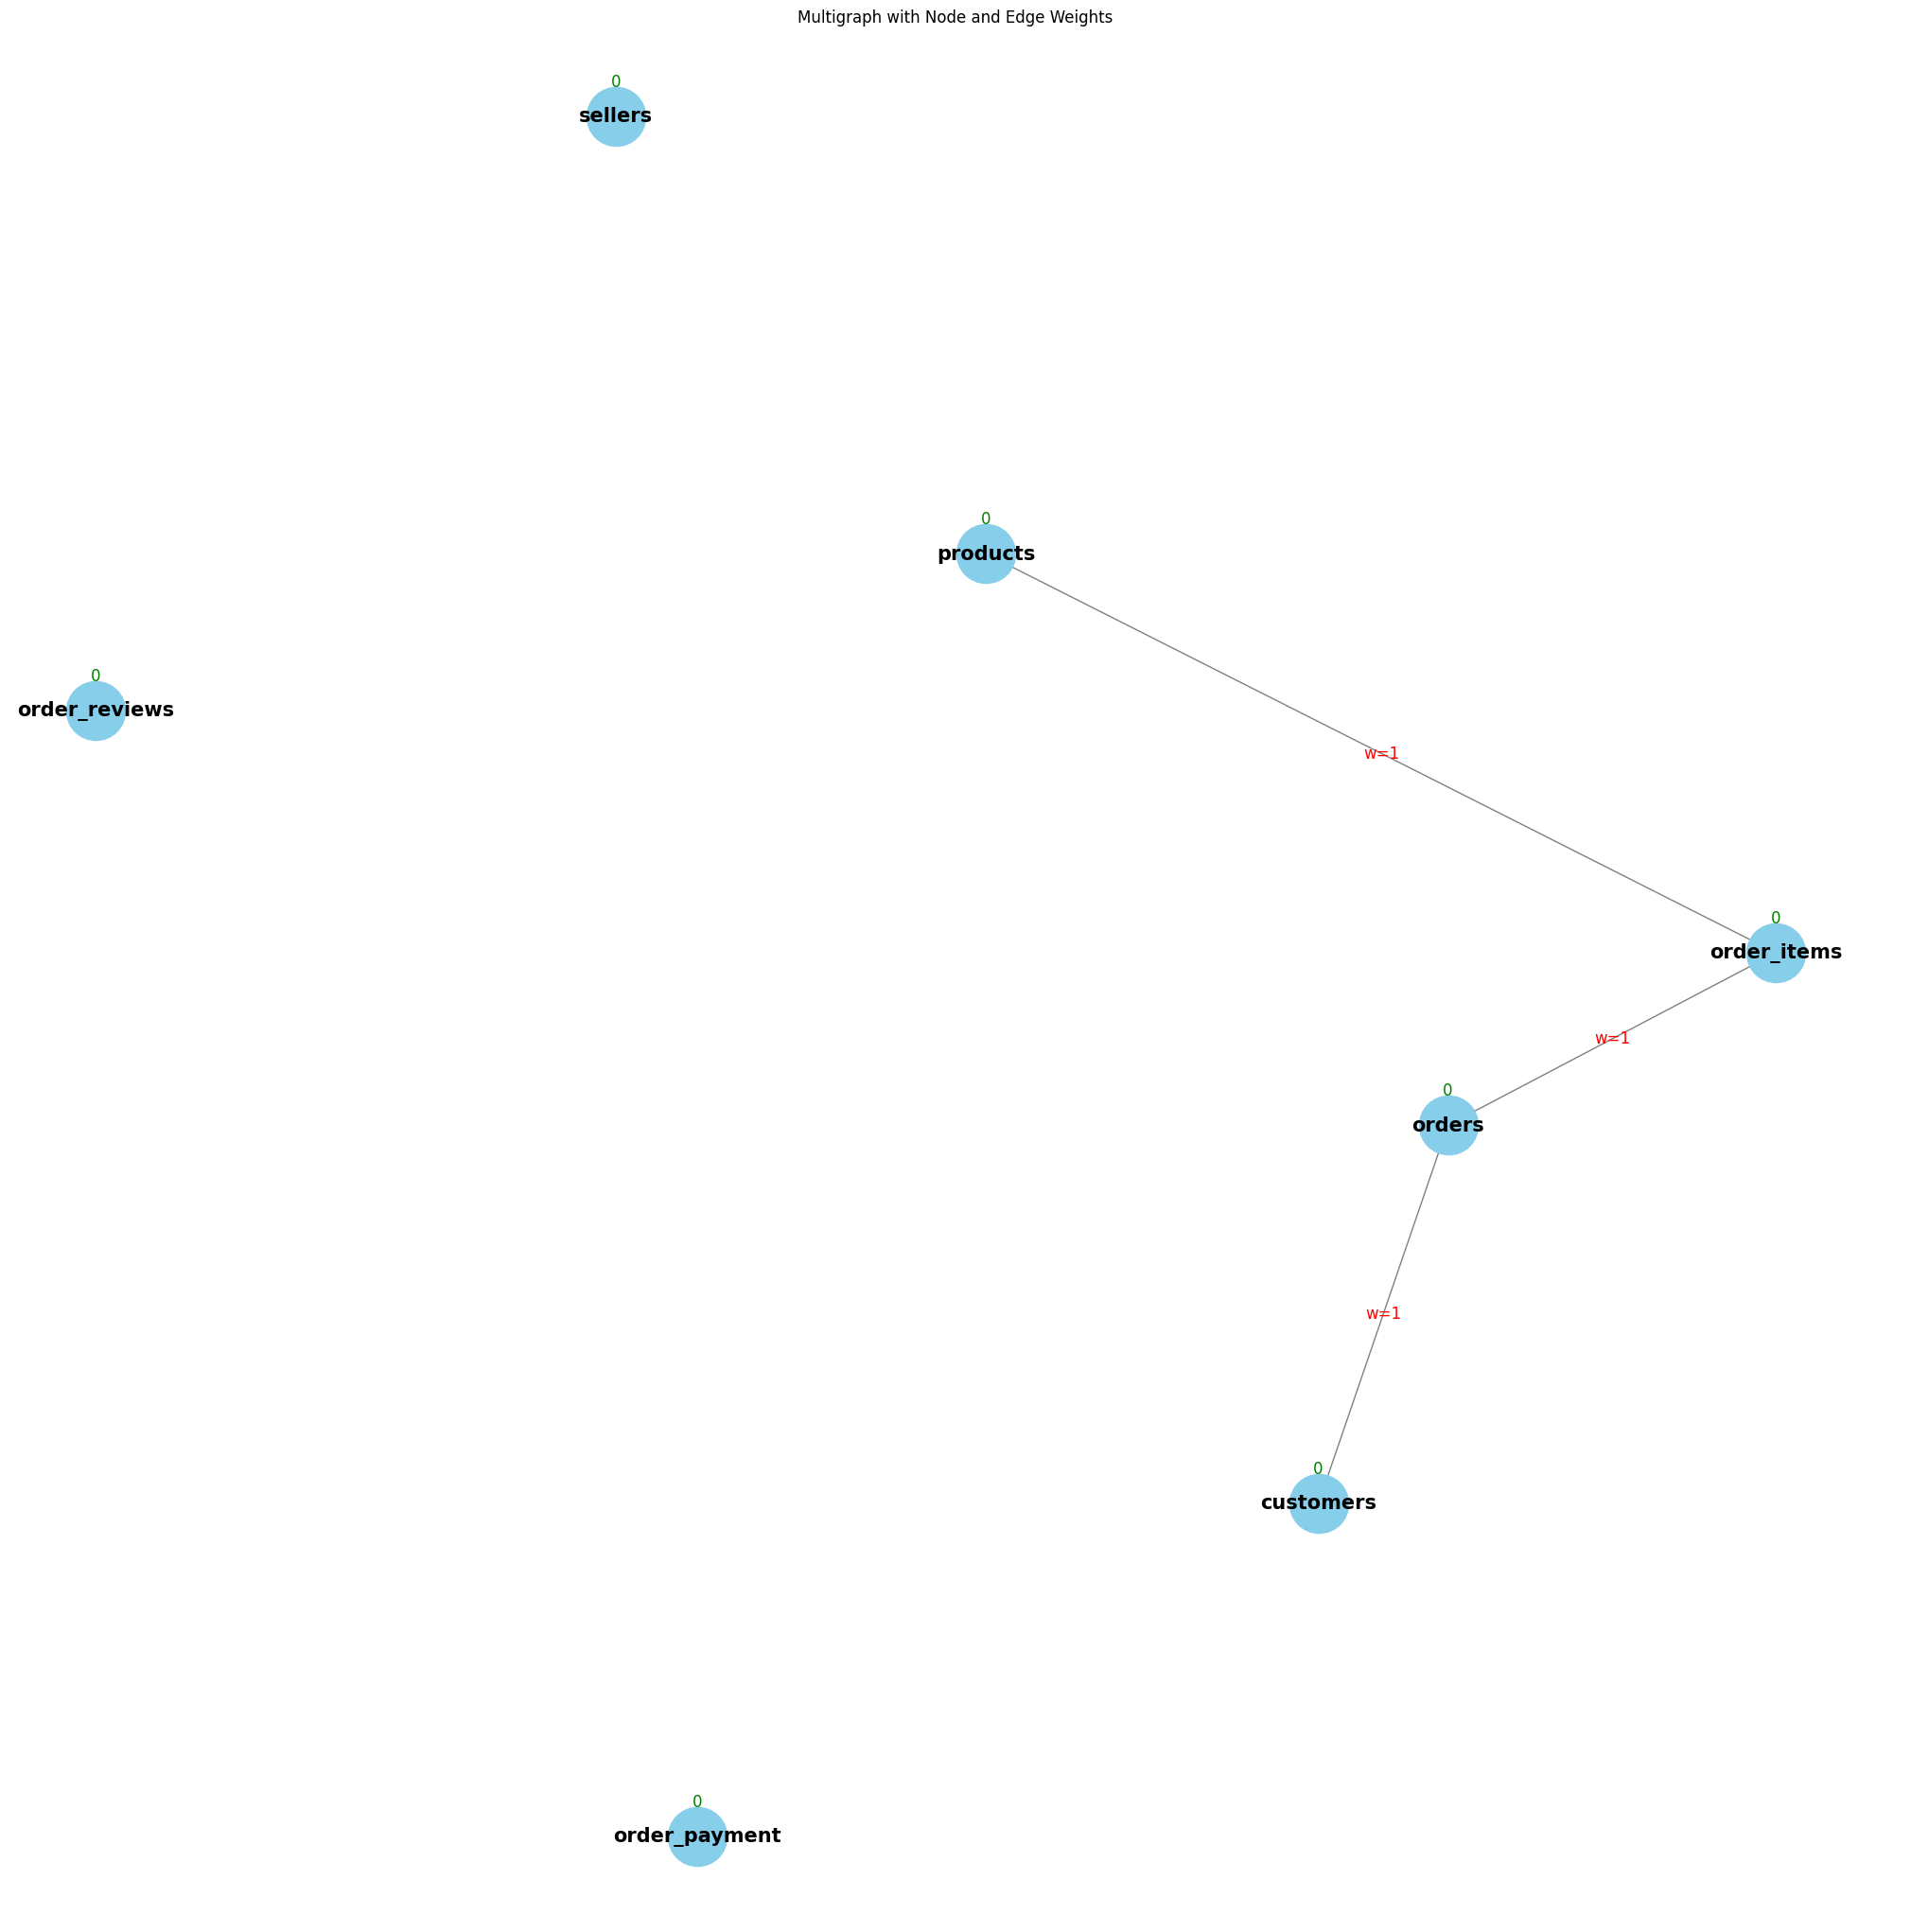

In [4]:
sql_generator.plot_sources_graph()

In [6]:
sql_generator.generate_query(etl)

"SELECT count(order_items.price) as `price` FROM `orders` LEFT JOIN `order_items` ON order_items.order_id = orders.order_id LEFT JOIN `products` ON order_items.product_id = products.product_id WHERE (products.product_id IN '['aaa', 'bbb']') ORDER BY `orders`.`order_id` DESC"